표준 정규 분포로부터 뽑아 95%의 신뢰구간을 구하는 것을 20번 반복했을 때,
몇 개의 신뢰구간이 모평균을 포함할지 확인

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%precision 3
np.random.seed(1111)

In [8]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])

In [9]:
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.53, 206.6691)

(array([ 1.,  2.,  2.,  1.,  6., 13., 11., 14., 36., 32., 37., 46., 34.,
        31., 43., 27., 22., 22., 12.,  8.]),
 array([ 23.  ,  26.85,  30.7 ,  34.55,  38.4 ,  42.25,  46.1 ,  49.95,
         53.8 ,  57.65,  61.5 ,  65.35,  69.2 ,  73.05,  76.9 ,  80.75,
         84.6 ,  88.45,  92.3 ,  96.15, 100.  ]),
 <BarContainer object of 20 artists>)

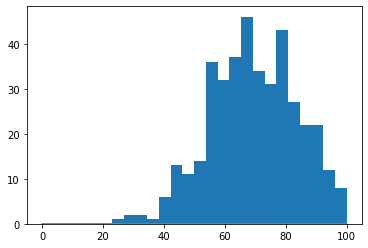

In [10]:
# 모집단의 분포
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color = 'gray')
plt.hist(scores, bins=20)

In [11]:
samples = np.random.choice(scores, (10000, 20))
samples[:5]

array([[68, 75, 91, 60, 76, 70, 59, 56, 77, 54, 77, 60, 67, 86, 70, 54,
        52, 72, 57, 59],
       [97, 55, 61, 89, 80, 85, 70, 67, 77, 81, 48, 67, 56, 74, 94, 64,
        83, 65, 73, 71],
       [78, 67, 43, 63, 79, 46, 89, 79, 86, 85, 70, 57, 55, 63, 49, 83,
        83, 76, 62, 71],
       [74, 62, 48, 73, 45, 67, 58, 83, 49, 83, 67, 59, 66, 52, 54, 53,
        78, 80, 81, 57],
       [63, 83, 67, 75, 74, 73, 77, 78, 66, 86, 82, 67, 78, 54, 65, 92,
        64, 91, 61, 57]])

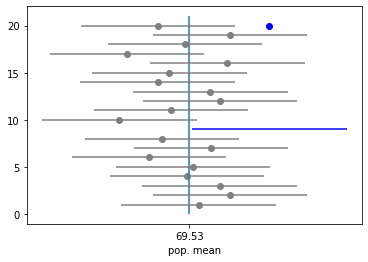

In [12]:
rv = stats.norm()
n_samples = 20

plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/20)
    ucl = s_mean + rv.isf(0.025) * np.sqrt(p_var/20)
    if lcl <= p_mean <= ucl :
        plt.scatter(s_mean, n_samples-i, color = 'gray')
        plt.hlines(n_samples-i, lcl, ucl, color='gray')
    else :
        plt.scatter(s_mean, n_samples, color='b')
        plt.hlines(n_samples-i, lcl, ucl, color = 'b')

plt.xticks([p_mean])
plt.xlabel('pop. mean')
plt.show()

In [13]:
n = 20
alpha = 0.025
sample_ = samples[0]
s_mean = np.mean(sample_)
s_var = np.var(sample_)
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var / n)
ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var / n)

In [14]:
# 통계적 가설검정

df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])

In [15]:
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [16]:
s_var = np.var(sample)
s_var

14.735449489795883

In [17]:
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

In [18]:
# 검정통계량 Z
Z = (s_mean-130)/np.sqrt(9/14)
Z

-1.932298779026813

In [19]:
rv = stats.norm()
rv.isf(0.95)

-1.6448536269514722

In [20]:
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [21]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')


In [24]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053


In [25]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [26]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169
